## RL train the d20 model

I'm going to approach this like `challenge-30-sft-train-d20/sft-train-d20.ipynb`. I'll use the 8xH100 in lambda cloud and run all the scripts from this notebook.

Follow the instructions here to get the machine ready: `challenge-28-midtrain-d20/midtrain-d20.ipynb`

In [1]:
!nvidia-smi

Wed Nov 26 11:38:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.195.03             Driver Version: 570.195.03     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:61:00.0 Off |                    0 |
| N/A   25C    P0             71W /  700W |       0MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
import os
os.environ["PYTHONPATH"] = "../my_nanochat"

### RL train with tiny number of steps

Just to confirm the process runs through to completion, logs to wandb, etc.

In [5]:
!torchrun --standalone --nproc_per_node=8 -m scripts.my_chat_rl -- \
--source=sft --model_tag=d20 --num_steps=5 --run=challenge-36-1

W1126 11:43:51.144000 19228 torch/distributed/run.py:803] 
W1126 11:43:51.144000 19228 torch/distributed/run.py:803] *****************************************
W1126 11:43:51.144000 19228 torch/distributed/run.py:803] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1126 11:43:51.144000 19228 torch/distributed/run.py:803] *****************************************
Autodetected device type: cuda
/home/ubuntu/learn-nanochat/.venv/lib/python3.10/site-packages/torch/__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Py

### RL train for real

In [6]:
!torchrun --standalone --nproc_per_node=8 -m scripts.my_chat_rl -- \
--source=sft --model_tag=d20 --run=challenge-36-2

W1126 11:47:17.886000 20719 torch/distributed/run.py:803] 
W1126 11:47:17.886000 20719 torch/distributed/run.py:803] *****************************************
W1126 11:47:17.886000 20719 torch/distributed/run.py:803] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1126 11:47:17.886000 20719 torch/distributed/run.py:803] *****************************************
Autodetected device type: cuda
/home/ubuntu/learn-nanochat/.venv/lib/python3.10/site-packages/torch/__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Py

^ ugh, I made an indentation error in `my_chat_rl.py` so it did the final report and cleanup stuff before the loop was over. Fix and run again. Good thing is that the pass@k numbers went up on the step 60 evaluation. (Fixed wrong, that was run 36-3, fixed again.)

In [8]:
!torchrun --standalone --nproc_per_node=8 -m scripts.my_chat_rl -- \
--source=sft --model_tag=d20 --run=challenge-36-4

W1126 12:04:47.963000 24754 torch/distributed/run.py:803] 
W1126 12:04:47.963000 24754 torch/distributed/run.py:803] *****************************************
W1126 12:04:47.963000 24754 torch/distributed/run.py:803] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1126 12:04:47.963000 24754 torch/distributed/run.py:803] *****************************************
overriding source = sft
overriding model_tag = d20
overriding run = challenge-36-4
user_config: {'run': 'challenge-36-4', 'source': 'sft', 'dtype': 'bfloat16', 'device_type': '', 'num_steps': -1, 'device_batch_size': 8, 'examples_per_step': 16, 'num_samples': 16, 'max_new_tokens': 256, 'temperature': 1.0, 'top_k': 50, 'unembedding_lr': 0.004, 'embedding_lr': 0.2, 'matrix_lr': 0.02, 'weight_decay': 0.0, 'init_lr_frac': 0.05, 'num_epochs': 1, 'save_every': 60, 'eval_ever

### Do chat eval on RL model

My expectation (or at least hope) is to see accuracy on GSM8K go up from the centered accuracy of .05 (see `challenge-34-understand-reporting/run-evals-on-d20.ipynb`). Will the others stay around the same? Go up? Decline?

Looking at run, going to do this eval on step 240 checkpoint instead of the final one because of this which I'll look into more later:

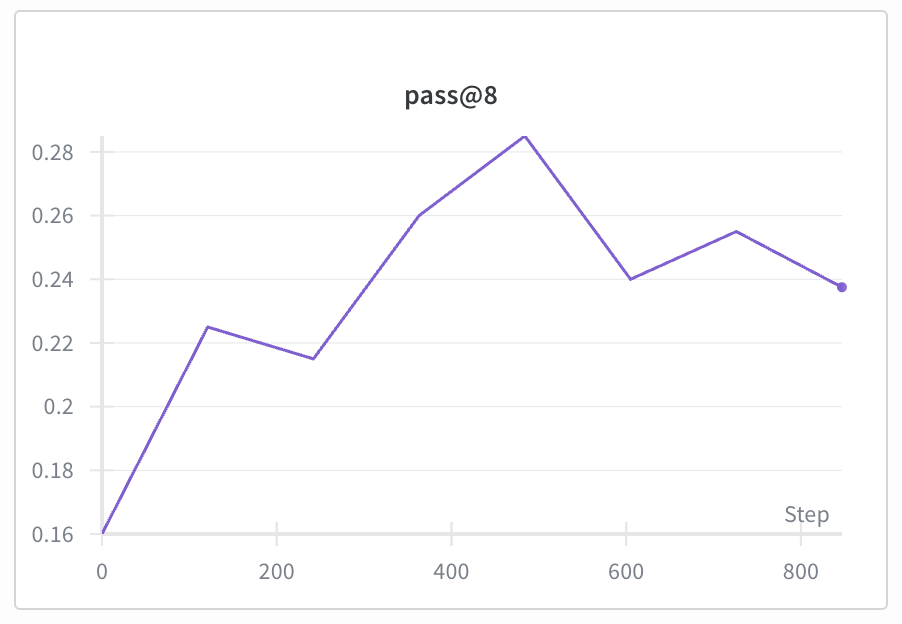

I'm not sure what the steps on the x-axis in the wandb graph mean, but I can see the one I'm interested in is the 5th point and we're evaluating every 60 steps: 0, 60, 120, 180, 240

In [9]:
!torchrun --standalone --nproc_per_node=8 -m scripts.my_chat_eval -- \
--source=rl --model-tag=d20 --step=240

W1126 12:51:04.240000 30132 torch/distributed/run.py:803] 
W1126 12:51:04.240000 30132 torch/distributed/run.py:803] *****************************************
W1126 12:51:04.240000 30132 torch/distributed/run.py:803] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1126 12:51:04.240000 30132 torch/distributed/run.py:803] *****************************************
Autodetected device type: cuda
/home/ubuntu/learn-nanochat/.venv/lib/python3.10/site-packages/torch/__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Py

### Rebuild final report

Total time will be completely wrong

In [10]:
!python -m my_nanochat.my_report

Generating report to /home/ubuntu/mynanochat/report/report.md
Copying report.md to current directory for convenience


In [11]:
from IPython.display import Markdown
Markdown(open('report.md').read())

# nanochat training report

Generated: 2025-11-25 01:35:30

## Environment

### Git Information
- Branch: master
- Commit: 2cf49d1 (dirty)
- Message: challenge 34: understand and add reporting - preparing to run evaluations on gpu

### Hardware
- Platform: Linux
- CPUs: 104 cores (208 logical)
- Memory: 1771.7 GB
- GPUs: 8x NVIDIA H100 80GB HBM3
- GPU Memory: 633.5 GB total
- CUDA Version: 12.8

### Software
- Python: 3.10.12
- PyTorch: 2.9.0+cu128

Run started: 2025-11-25 01:35:33

--

## Base model loss
timestamp: 2025-11-25 01:36:04

- train bpb: 0.8164
- val bpb: 0.8136
- sample 0: <|bos|>The capital of France is Paris. It is the largest city in France and the second largest city in Europe
- sample 1: <|bos|>The chemical symbol of gold is Au. It is a soft, malleable, ductile, and ductilely reactive metal
- sample 2: <|bos|>If yesterday was Friday, then tomorrow will be Monday. If tomorrow is Monday, then tomorrow will be Tuesday. If tomorrow is
- sample 3: <|bos|>The opposite of hot is cold. The opposite of cold is hot. The opposite of hot is cold.
- sample 4: <|bos|>The planets of the solar system are: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune,
- sample 5: <|bos|>My favorite color is red. It is the color of the blood of the martyrs. It is the
- sample 6: <|bos|>If 5*x + 3 = 13, then x is a factor of 5. If 5*x + 3 = 


## Base model evaluation
timestamp: 2025-11-25 01:39:38

- Model: base_model (step 21400)
- CORE metric: 0.2012
- hellaswag_zeroshot: 0.2567
- jeopardy: 0.1186
- bigbench_qa_wikidata: 0.5366
- arc_easy: 0.5292
- arc_challenge: 0.1354
- copa: 0.3800
- commonsense_qa: 0.0377
- piqa: 0.3591
- openbook_qa: 0.1467
- lambada_openai: 0.3745
- hellaswag: 0.2628
- winograd: 0.2821
- winogrande: 0.0560
- bigbench_dyck_languages: 0.1020
- agi_eval_lsat_ar: 0.0272
- bigbench_cs_algorithms: 0.3583
- bigbench_operators: 0.1667
- bigbench_repeat_copy_logic: 0.0000
- squad: 0.2345
- coqa: 0.1813
- boolq: -0.2973
- bigbench_language_identification: 0.1782


## Chat evaluation mid
timestamp: 2025-11-25 01:48:21

- source: mid
- task_name: None
- dtype: bfloat16
- temperature: 0.0000
- max_new_tokens: 512
- num_samples: 1
- top_k: 50
- batch_size: 8
- model_tag: d20
- step: None
- max_problems: None
- print_failed: False
- device_type: 
- ARC-Easy: 0.4318
- ARC-Challenge: 0.3319
- MMLU: 0.3307
- GSM8K: 0.0341
- HumanEval: 0.0671
- SpellingBee: 0.9805
- ChatCORE metric: 0.2568


## Chat evaluation sft
timestamp: 2025-11-25 01:55:32

- source: sft
- task_name: None
- dtype: bfloat16
- temperature: 0.0000
- max_new_tokens: 512
- num_samples: 1
- top_k: 50
- batch_size: 8
- model_tag: d20
- step: None
- max_problems: None
- print_failed: False
- device_type: 
- ARC-Easy: 0.4436
- ARC-Challenge: 0.3183
- MMLU: 0.3226
- GSM8K: 0.0500
- HumanEval: 0.0610
- SpellingBee: 0.9727
- ChatCORE metric: 0.2549


## Chat RL
timestamp: 2025-11-26 12:48:36

- run: challenge-36-4
- source: sft
- dtype: bfloat16
- device_type: 
- num_steps: -1
- device_batch_size: 8
- examples_per_step: 16
- num_samples: 16
- max_new_tokens: 256
- temperature: 1.0000
- top_k: 50
- unembedding_lr: 0.0040
- embedding_lr: 0.2000
- matrix_lr: 0.0200
- weight_decay: 0.0000
- init_lr_frac: 0.0500
- num_epochs: 1
- save_every: 60
- eval_every: 60
- eval_examples: 400


## Chat evaluation rl
timestamp: 2025-11-26 12:54:38

- source: rl
- task_name: None
- dtype: bfloat16
- temperature: 0.0000
- max_new_tokens: 512
- num_samples: 1
- top_k: 50
- batch_size: 8
- model_tag: d20
- step: 240
- max_problems: None
- print_failed: False
- device_type: 
- ARC-Easy: 0.4512
- ARC-Challenge: 0.3123
- MMLU: 0.3206
- GSM8K: 0.0879
- HumanEval: 0.0305
- SpellingBee: 0.9062
- ChatCORE metric: 0.2450


## Summary

| Metric          | BASE     | MID      | SFT      | RL       |
|-----------------|----------|----------|----------|----------|
| CORE            | 0.2012   | -        | -        | -        |
| ARC-Challenge   | -        | 0.3319   | 0.3183   | -        |
| ARC-Easy        | -        | 0.4318   | 0.4436   | -        |
| GSM8K           | -        | 0.0341   | 0.0500   | 0.0879   |
| HumanEval       | -        | 0.0671   | 0.0610   | -        |
| MMLU            | -        | 0.3307   | 0.3226   | -        |
| ChatCORE        | -        | 0.2568   | 0.2549   | -        |

Total wall clock time: 35h19m


^ Why is it only filling in GSM8K for RL column? I can see the info was collected above.

Changed in `my_report.py` and will run again.

In [2]:
import os
os.environ["PYTHONPATH"] = "../my_nanochat"
!python -m my_nanochat.my_report

Generating report to /home/ubuntu/mynanochat/report/report.md
Copying report.md to current directory for convenience


In [4]:
from IPython.display import Markdown
Markdown(open('report.md').read())

# nanochat training report

Generated: 2025-11-25 01:35:30

## Environment

### Git Information
- Branch: master
- Commit: 2cf49d1 (dirty)
- Message: challenge 34: understand and add reporting - preparing to run evaluations on gpu

### Hardware
- Platform: Linux
- CPUs: 104 cores (208 logical)
- Memory: 1771.7 GB
- GPUs: 8x NVIDIA H100 80GB HBM3
- GPU Memory: 633.5 GB total
- CUDA Version: 12.8

### Software
- Python: 3.10.12
- PyTorch: 2.9.0+cu128

Run started: 2025-11-25 01:35:33

--

## Base model loss
timestamp: 2025-11-25 01:36:04

- train bpb: 0.8164
- val bpb: 0.8136
- sample 0: <|bos|>The capital of France is Paris. It is the largest city in France and the second largest city in Europe
- sample 1: <|bos|>The chemical symbol of gold is Au. It is a soft, malleable, ductile, and ductilely reactive metal
- sample 2: <|bos|>If yesterday was Friday, then tomorrow will be Monday. If tomorrow is Monday, then tomorrow will be Tuesday. If tomorrow is
- sample 3: <|bos|>The opposite of hot is cold. The opposite of cold is hot. The opposite of hot is cold.
- sample 4: <|bos|>The planets of the solar system are: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune,
- sample 5: <|bos|>My favorite color is red. It is the color of the blood of the martyrs. It is the
- sample 6: <|bos|>If 5*x + 3 = 13, then x is a factor of 5. If 5*x + 3 = 


## Base model evaluation
timestamp: 2025-11-25 01:39:38

- Model: base_model (step 21400)
- CORE metric: 0.2012
- hellaswag_zeroshot: 0.2567
- jeopardy: 0.1186
- bigbench_qa_wikidata: 0.5366
- arc_easy: 0.5292
- arc_challenge: 0.1354
- copa: 0.3800
- commonsense_qa: 0.0377
- piqa: 0.3591
- openbook_qa: 0.1467
- lambada_openai: 0.3745
- hellaswag: 0.2628
- winograd: 0.2821
- winogrande: 0.0560
- bigbench_dyck_languages: 0.1020
- agi_eval_lsat_ar: 0.0272
- bigbench_cs_algorithms: 0.3583
- bigbench_operators: 0.1667
- bigbench_repeat_copy_logic: 0.0000
- squad: 0.2345
- coqa: 0.1813
- boolq: -0.2973
- bigbench_language_identification: 0.1782


## Chat evaluation mid
timestamp: 2025-11-25 01:48:21

- source: mid
- task_name: None
- dtype: bfloat16
- temperature: 0.0000
- max_new_tokens: 512
- num_samples: 1
- top_k: 50
- batch_size: 8
- model_tag: d20
- step: None
- max_problems: None
- print_failed: False
- device_type: 
- ARC-Easy: 0.4318
- ARC-Challenge: 0.3319
- MMLU: 0.3307
- GSM8K: 0.0341
- HumanEval: 0.0671
- SpellingBee: 0.9805
- ChatCORE metric: 0.2568


## Chat evaluation sft
timestamp: 2025-11-25 01:55:32

- source: sft
- task_name: None
- dtype: bfloat16
- temperature: 0.0000
- max_new_tokens: 512
- num_samples: 1
- top_k: 50
- batch_size: 8
- model_tag: d20
- step: None
- max_problems: None
- print_failed: False
- device_type: 
- ARC-Easy: 0.4436
- ARC-Challenge: 0.3183
- MMLU: 0.3226
- GSM8K: 0.0500
- HumanEval: 0.0610
- SpellingBee: 0.9727
- ChatCORE metric: 0.2549


## Chat RL
timestamp: 2025-11-26 12:48:36

- run: challenge-36-4
- source: sft
- dtype: bfloat16
- device_type: 
- num_steps: -1
- device_batch_size: 8
- examples_per_step: 16
- num_samples: 16
- max_new_tokens: 256
- temperature: 1.0000
- top_k: 50
- unembedding_lr: 0.0040
- embedding_lr: 0.2000
- matrix_lr: 0.0200
- weight_decay: 0.0000
- init_lr_frac: 0.0500
- num_epochs: 1
- save_every: 60
- eval_every: 60
- eval_examples: 400


## Chat evaluation rl
timestamp: 2025-11-26 12:54:38

- source: rl
- task_name: None
- dtype: bfloat16
- temperature: 0.0000
- max_new_tokens: 512
- num_samples: 1
- top_k: 50
- batch_size: 8
- model_tag: d20
- step: 240
- max_problems: None
- print_failed: False
- device_type: 
- ARC-Easy: 0.4512
- ARC-Challenge: 0.3123
- MMLU: 0.3206
- GSM8K: 0.0879
- HumanEval: 0.0305
- SpellingBee: 0.9062
- ChatCORE metric: 0.2450


## Summary

| Metric          | BASE     | MID      | SFT      | RL       |
|-----------------|----------|----------|----------|----------|
| CORE            | 0.2012   | -        | -        | -        |
| ARC-Challenge   | -        | 0.3319   | 0.3183   | 0.3123   |
| ARC-Easy        | -        | 0.4318   | 0.4436   | 0.4512   |
| GSM8K           | -        | 0.0341   | 0.0500   | 0.0879   |
| HumanEval       | -        | 0.0671   | 0.0610   | 0.0305   |
| MMLU            | -        | 0.3307   | 0.3226   | 0.3206   |
| ChatCORE        | -        | 0.2568   | 0.2549   | 0.2450   |

Total wall clock time: 35h19m


### Back on mac

Was on GPU machine for 1.49 hours and spent $35.75.

In [2]:
.0305 / .0610

0.5

In [3]:
164 * .0610

10.004

In [4]:
164 * .0305

5.002